In [38]:
import os
import sys
import utils
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns

pipedir = "pipe2/"
ffa2_results_location = pipedir+"ffa/results/stats/"
w2v2_results_file     = pipedir+"w2v/results.txt"

pipedir2 = "pipe5/"
ffa5_results_location = pipedir2+"ffa/results/stats/"
w2v5_results_file     = pipedir2+"w2v/results.txt"

In [40]:
#read in fruit fly results 
for filename in os.listdir(ffa2_results_location):
    if not os.path.isdir(filename):
        with open(os.path.join(ffa2_results_location, filename)) as f:
            lines = [l.rstrip() for l in f.readlines()]
            run = int(lines[0].split()[-1][:-1]) # extracts the run number
            run_to_res[run] = [float(lines[2].split()[-1]),
                               float(lines[3].split()[-1]),
                               float(lines[4].split()[-1])] # [spb, spa, sp_diff]

In [41]:
#read in fruit fly results 
for filename in os.listdir(ffa5_results_location):
    if not os.path.isdir(filename):
        with open(os.path.join(ffa5_results_location, filename)) as f:
            lines = [l.rstrip() for l in f.readlines()]
            run = int(lines[0].split()[-1][:-1]) # extracts the run number
            run_to_res[run].extend([float(lines[2].split()[-1]),
                               float(lines[3].split()[-1]),
                               float(lines[4].split()[-1])]) # [spb, spa, sp_diff]

In [32]:
# read in word2vec results
with open(w2v2_results_file, "r") as f:
    lines = [l.rstrip() for l in f.readlines()]
    for l in lines:
        run = int(l.split()[1][:-1]) # extracts the run number
        run_to_res[run].append(float(l.split()[3])) 

In [33]:
# read in word2vec results
with open(w2v5_results_file, "r") as f:
    lines = [l.rstrip() for l in f.readlines()]
    for l in lines:
        run = int(l.split()[1][:-1]) # extracts the run number
        run_to_res[run].append(float(l.split()[3])) 

In [26]:
for k,v in run_to_res.items():
    #print(k, round(v[2], 4))
    print(k, v)

1 [-0.034192692552962714, 0.07775202980404604, 0.11194472235700875, 0.021030145899121597, 0.11938997406934353, 0.09835982817022193, 0.12895975625166395, 0.1583329401493926]
2 [0.01572657802020805, 0.1450196393718179, 0.12929306135160984, 0.02553999681133373, 0.14333789143951572, 0.11779789462818199, 0.1482475266386761, 0.1534012074073644]
3 [0.01158260667904229, 0.15270641362474408, 0.14112380694570179, 0.025499738062958355, 0.15235980136949775, 0.1268600633065394, 0.12959338685679828, 0.16143405917838372]
4 [-0.0005998771673418335, 0.14877200029901488, 0.14937187746635672, 0.01632869143236429, 0.15229797765318515, 0.13596928622082086, 0.14183768016137288, 0.16630329958214812]
5 [-0.004334799092319291, 0.15090118586166584, 0.15523598495398513, 0.01326453056414098, 0.1561675074781971, 0.14290297691405612, 0.1591923503296345, 0.17138754079896457]
6 [-0.001229489213879692, 0.15233634246007657, 0.15356583167395627, 0.014499668021012824, 0.15465217577358797, 0.14015250775257515, 0.173221218

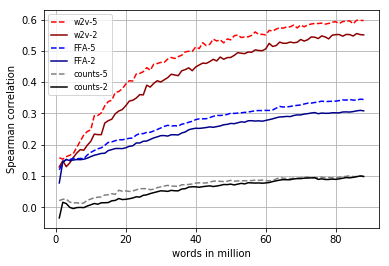

In [27]:
# [spb2, spa2, spd2,    spb5, spa5, spd5,    w2v2, w2v5]

""""
# for pipe3
del run_to_res[28]
datarows = {
    "counts":[v[0] for v in run_to_res.values()],
    "FFA-5":[v[1] for v in run_to_res.values()],
    "W2V-5":[v[3] for v in run_to_res.values()],
    "runs": [k for k in run_to_res]
}
"""
# FOR BOTH PIPES
datarows = {
    "w2v-5":[v[7] for v in run_to_res.values()],
    "w2v-2":[v[6] for v in run_to_res.values()],
    "FFA-5":[v[4] for v in run_to_res.values()],
    "FFA-2":[v[1] for v in run_to_res.values()],
    "counts-5":[v[3] for v in run_to_res.values()],
    "counts-2":[v[0] for v in run_to_res.values()],
    "runs": [k for k in run_to_res]
}


df = DataFrame(datarows)
#df = DataFrame(datarows, index=runs)

plot = df.plot.line(x="runs", grid=True, 
                    color=["red", "darkred", "blue", "darkblue", "grey", "black"],
                    style=["--",  "-",       "--",   "-",        "--",   "-"])
plot.set_xlabel("words in million")
plot.set_ylabel("Spearman correlation")
plot.legend(loc=2, prop={'size': 8})

In [28]:
fig = plot.get_figure()
fig.savefig(graphics_filename)